In [1]:
import numpy as np
import pandas as pd

from src.M4_experiment import M4_parser
from src.utils.data import long_to_wide
from src.utils_visualization import plot_prediction
from src.ESRNN import ESRNN

In [2]:
dataset = M4_parser(dataset_name='Quarterly', mode='train', num_obs=100)
X, y = long_to_wide(dataset)
print(X[:5])
print(y[:5])

[['Q1' 'Macro']
 ['Q10' 'Macro']
 ['Q100' 'Macro']
 ['Q11' 'Macro']
 ['Q12' 'Macro']]
[[7407.41231382 7528.5660743  7374.70922497 ...           nan
            nan           nan]
 [2329.         2349.9        2332.9        ...           nan
            nan           nan]
 [5036.         5089.         5226.         ...           nan
            nan           nan]
 [1082.5        1076.1        1063.1        ...           nan
            nan           nan]
 [3726.         4048.         4704.         ...           nan
            nan           nan]]


In [3]:
esrnn = ESRNN(max_epochs=0, batch_size=2)
esrnn.fit(X,y)
preds = esrnn.predict()

========== Training ESRNN ==========
Train finished!


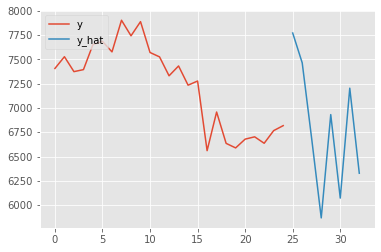

In [4]:
unique_id = "Q1"
y_ori = y[X[:, 0]==unique_id].squeeze()
y_ori = y_ori[~np.isnan(y_ori)]
y_hat = preds[preds['unique_id']==unique_id]['y_hat']
plot_prediction(y_ori, y_hat)

In [5]:
esrnn = ESRNN(max_epochs=10)
esrnn.fit(X,y)
preds = esrnn.predict()

========== Training ESRNN ==========
========= Epoch 0 finished =========
Training time: 8.29337191581726
Forecast loss: 0.08462110161781311
========= Epoch 1 finished =========
Training time: 8.108947038650513
Forecast loss: 0.07944739609956741
========= Epoch 2 finished =========
Training time: 9.085734844207764
Forecast loss: 0.07724111527204514
========= Epoch 3 finished =========
Training time: 8.25964641571045
Forecast loss: 0.07560942322015762
========= Epoch 4 finished =========
Training time: 8.19982123374939
Forecast loss: 0.073987677693367
========= Epoch 5 finished =========
Training time: 8.387556791305542
Forecast loss: 0.07249929755926132
========= Epoch 6 finished =========
Training time: 8.333739995956421
Forecast loss: 0.07126843184232712
========= Epoch 7 finished =========
Training time: 8.328459024429321
Forecast loss: 0.07018478214740753
========= Epoch 8 finished =========
Training time: 8.572029829025269
Forecast loss: 0.06909148395061493
========= Epoch 9 finis

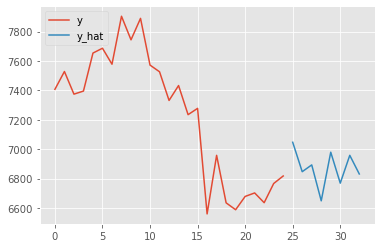

In [6]:
unique_id = "Q1"
y_ori = y[X[:, 0]==unique_id].squeeze()
y_ori = y_ori[~np.isnan(y_ori)]
y_hat = preds[preds['unique_id']==unique_id]['y_hat']
plot_prediction(y_ori, y_hat)

In [ ]:
import pandas as pd
import numpy as np

import torch
from src.ESRNN import ESRNN
from src.utils.data import Iterator, long_to_wide
from src.M4_experiment import M4_parser

data = {'unique_id': ["q1", "q1", "q1", "q1", "q2", "q2", "q2", "q3", "q4", "q4", "q4"], 
        'ts': [1, 2, 3, 4, 1, 2, 3, 1, 1, 2, 3],
        'x': ["a", "a", "a", "a", "b", "b", "b", "c", "d", "d", "d"],
        'y': [1.1, 1.2, 1.3, 1.4, 2.1, 2.2, 2.3, 3.1, 4.1, 4.2, 4.3]}
dataset = pd.DataFrame.from_dict(data)
# dataset = M4_parser('Quarterly', mode='train', num_obs=200, data_dir='./data/m4')

X, y = long_to_wide(dataset)
esrnn = ESRNN()

mc = esrnn.mc
unique_categories = dataset['x'].unique()
mc.category_to_idx = dict((word, index) for index, word in enumerate(unique_categories))
mc.exogenous_size = len(unique_categories)
mc.batch_size = 2

iterator = Iterator(mc=mc, X=X, y=y, shuffle=True)

batch = iterator.get_batch()
print("iterator.sort_key \n", iterator.sort_key)
print("batch.y \n", batch.y)
print("batch.idxs", batch.idxs)
print("iterator.X \n", iterator.X)

In [ ]:
unique_idxs = ["q1", "q2", "q3"]
ver = np.array([1,2,3])
print(ver.shape)
unique_idxs[np.argwhere(ver==2)[0][0]]

In [ ]:
X[0]==unique_id

In [ ]:
y_ori.shape
y_hat.shape